TODO
- [ ] Write methodology  
- [x] Remove irrelevant data columns in the preprocessing  
- [ ] Salary above grant and living wage  
- [ ] Number of places available per area + average and median salary by geography  
- [ ] Number of visa available places over 3 years  
- [ ] Number of split placements available over 3 years  
- [ ] Salary by tye of placement  
- [ ] Hourly wage graph with minimum wage (for 21+) and living wage  
- [ ] Hours worked per week (expectation to work on the weekends and lates in hospitals)  



- https://survey.stackoverflow.co/2024/
- https://www.gov.uk/national-minimum-wage-rates

- Make online database using openai API to summarise the programme description into quick bullet points with filter function e.g. geographical

In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(openai)
library(purrr)

# Load the data
OD2526 <- read.csv("oriel-training-year-2526.csv")

OD2425 <- read.csv("oriel-training-year-2425.csv")

OD2324 <- read.csv("oriel-training-year-2324.csv")

OD2223 <- read.csv("oriel-training-year-2223.csv")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
colnames(OD2526)
colnames(OD2425)

[1] "Programme.SystemID"                      
 [2] "Recruitment.Office"                      
 [3] "Region"                                  
 [4] "Sub.Region"                              
 [5] "Sector"                                  
 [6] "Post.Type"                               
 [7] "Programme.Preference"                    
 [8] "Abbreviation"                            
 [9] "Programme.Title"                         
[10] "Programme.Description"                   
[11] "Places.Available"                        
[12] "Start.Date"                              
[13] "Employer.Type"                           
[14] "Employer.Name"                           
[15] "Size.of.organisation..Primary.care.only."
[16] "Specialties..Hospital.only."             
[17] "Skilled.worker.visa"                     
[18] "Number.of.Licences"                      
[19] "Salary...."                              
[20] "Training.Provider"                       
[21] "Employer.website"                        
[22] "Hours.per.Week"                          
[23] "ProgrammeNumber"                         
[24] "ProgrammeName"                           
[25] "ICB.Name"                                
[26] "Pharmacy.Programme.Number"               
[27] "Number.of.Placements.Rotations"          
[28] "Practice.Placement.Rotation.Setting.1"   
[29] "Length.of.Placement.Rotation.1..weeks."  
[30] "Practice.Placement.Rotation.Setting.2"   
[31] "Length.of.Placement.Rotation.2..weeks."  
[32] "Practice.Placement.Rotation.Setting.3"   
[33] "Length.of.Placement.Rotation.3..weeks."  
[34] "Practice.Placement.Rotation.Setting.4"   
[35] "Length.of.Placement.Rotation.4..weeks."  
[36] "Placement.Rotation.1..SystemID"          
[37] "Placement.Rotation.2..SystemID"          
[38] "Placement.Rotation.3..SystemID"          
[39] "Placement.Rotation.4..SystemID"

[1] "Programme.SystemID"                      
 [2] "Recruitment.Office"                      
 [3] "Region"                                  
 [4] "Sub.Region"                              
 [5] "Sector"                                  
 [6] "Post.Type"                               
 [7] "Programme.Preference"                    
 [8] "Abbreviation"                            
 [9] "Programme.Title"                         
[10] "Programme.Description"                   
[11] "Places.Available"                        
[12] "Start.Date"                              
[13] "Employer.Type"                           
[14] "Employer.Name"                           
[15] "Size.of.organisation..Primary.care.only."
[16] "Specialties..Hospital.only."             
[17] "Skilled.worker.visa"                     
[18] "Number.of.Licences"                      
[19] "Salary...."                              
[20] "Training.Provider"                       
[21] "Employer.website"                        
[22] "Hours.per.Week"                          
[23] "ProgrammeNumber"                         
[24] "ProgrammeName"                           
[25] "ICS.Name"                                
[26] "Pharmacy.Programme.Number"               
[27] "Number.of.Placements..3.months.or.more." 
[28] "Practice.Placement.Setting.1"            
[29] "Length.of.Placement.1..3.months.or.more."
[30] "Practice.Placement.Setting.2"            
[31] "Length.of.Placement.2..3.months.or.more."
[32] "Practice.Placement.Setting.3"            
[33] "Length.of.Placement.3..3.months.or.more."
[34] "Practice.Placement.Setting.4"            
[35] "Length.of.Placement.4..3.months.or.more."
[36] "Placement.1..SystemID"                   
[37] "Placement.2..SystemID"                   
[38] "Placement.3..SystemID"                   
[39] "Placement.4..SystemID"

- Do not need the following columns from 2526 data: 

'Programme.SystemID', 'Recruitment.Office', 'Post.Type', 'Abbreviation', 'Start.Date','Employer.website', 'ProgrammeNumber', 'ProgrammeName', 'Pharmacy.Programme.Number', 'Length.of.Placement.Rotation.1..weeks.', 'Length.of.Placement.Rotation.2..weeks', 'Length.of.Placement.Rotation.3..weeks.','Length.of.Placement.Rotation.4..weeks.','Placement.Rotation.1..SystemID','Placement.Rotation.2..SystemID','Placement.Rotation.3..SystemID','Placement.Rotation.4..SystemID'

- Do not need the following columns from 2425 data:

'Programme.SystemID','Recruitment.Office','Post.Type','Abbreviation','Start.Date','Employer.website','ProgrammeNumber','ProgrammeName','Pharmacy.Programme.Number','Placement.4..SystemID','Placement.3..SystemID','Placement.2..SystemID','Placement.1..SystemID','Length.of.Placement.4..3.months.or.more.','Length.of.Placement.2..3.months.or.more.','Length.of.Placement.1..3.months.or.more.','Length.of.Placement.3..3.months.or.more.'




In [3]:
OD2526_irrelevant <- c('Programme.SystemID', 'Recruitment.Office', 'Post.Type', 'Abbreviation', 'Start.Date','Employer.website', 'ProgrammeNumber', 'ProgrammeName', 'Pharmacy.Programme.Number', 'Length.of.Placement.Rotation.1..weeks.', 'Length.of.Placement.Rotation.2..weeks.', 'Length.of.Placement.Rotation.3..weeks.','Length.of.Placement.Rotation.4..weeks.','Placement.Rotation.1..SystemID','Placement.Rotation.2..SystemID','Placement.Rotation.3..SystemID','Placement.Rotation.4..SystemID')
OD2425_irrelevant <- c('Programme.SystemID','Recruitment.Office','Post.Type','Abbreviation','Start.Date','Employer.website','ProgrammeNumber','ProgrammeName','Pharmacy.Programme.Number','Placement.4..SystemID','Placement.3..SystemID','Placement.2..SystemID','Placement.1..SystemID','Length.of.Placement.4..3.months.or.more.','Length.of.Placement.2..3.months.or.more.','Length.of.Placement.1..3.months.or.more.','Length.of.Placement.3..3.months.or.more.')

OD2526_modified <- select(OD2526, -one_of(OD2526_irrelevant))
OD2425_modified <- select(OD2425, -one_of(OD2425_irrelevant))

colnames(OD2526_modified)
colnames(OD2425_modified)

[1] "Region"                                  
 [2] "Sub.Region"                              
 [3] "Sector"                                  
 [4] "Programme.Preference"                    
 [5] "Programme.Title"                         
 [6] "Programme.Description"                   
 [7] "Places.Available"                        
 [8] "Employer.Type"                           
 [9] "Employer.Name"                           
[10] "Size.of.organisation..Primary.care.only."
[11] "Specialties..Hospital.only."             
[12] "Skilled.worker.visa"                     
[13] "Number.of.Licences"                      
[14] "Salary...."                              
[15] "Training.Provider"                       
[16] "Hours.per.Week"                          
[17] "ICB.Name"                                
[18] "Number.of.Placements.Rotations"          
[19] "Practice.Placement.Rotation.Setting.1"   
[20] "Practice.Placement.Rotation.Setting.2"   
[21] "Practice.Placement.Rotation.Setting.3"   
[22] "Practice.Placement.Rotation.Setting.4"

[1] "Region"                                  
 [2] "Sub.Region"                              
 [3] "Sector"                                  
 [4] "Programme.Preference"                    
 [5] "Programme.Title"                         
 [6] "Programme.Description"                   
 [7] "Places.Available"                        
 [8] "Employer.Type"                           
 [9] "Employer.Name"                           
[10] "Size.of.organisation..Primary.care.only."
[11] "Specialties..Hospital.only."             
[12] "Skilled.worker.visa"                     
[13] "Number.of.Licences"                      
[14] "Salary...."                              
[15] "Training.Provider"                       
[16] "Hours.per.Week"                          
[17] "ICS.Name"                                
[18] "Number.of.Placements..3.months.or.more." 
[19] "Practice.Placement.Setting.1"            
[20] "Practice.Placement.Setting.2"            
[21] "Practice.Placement.Setting.3"            
[22] "Practice.Placement.Setting.4"

In [4]:
# Changing column names to match the 2022-2023 and 2023-2024 datasets and improve readability
# Resume

OD2526_modified <- OD2526_modified %>%
  rename(
    Region = Region,
    SubRegion = Sub.Region,
    Sector = Sector,
    ProgramPreference = Programme.Preference,
    ProgramTitle = Programme.Title,
    ProgramDescription = Programme.Description,
    AvailableSlots = Places.Available,
    EmployerType = Employer.Type,
    EmployerName = Employer.Name,
    OrgSizePrimaryCareOnly = Size.of.organisation..Primary.care.only.,
    HospitalSpecialties = Specialties..Hospital.only.,
    SkilledWorkerVisa = Skilled.worker.visa,
    LicenseCount = Number.of.Licences,
    Salary = Salary....,
    TrainingProvider = Training.Provider,
    WeeklyHours = Hours.per.Week,
    ICBName = ICB.Name,
    PlacementRotationCount = Number.of.Placements.Rotations,
    RotationSetting1 = Practice.Placement.Rotation.Setting.1,
    RotationSetting2 = Practice.Placement.Rotation.Setting.2,
    RotationSetting3 = Practice.Placement.Rotation.Setting.3,
    RotationSetting4 = Practice.Placement.Rotation.Setting.4
  )

OD2425_modified <- OD2425_modified %>%
  rename(
    SubRegion = Sub.Region,
    ProgramPreference = Programme.Preference,
    ProgramTitle = Programme.Title,
    ProgramDescription = Programme.Description,
    AvailableSlots = Places.Available,
    EmployerType = Employer.Type,
    EmployerName = Employer.Name,
    OrgSizePrimaryCareOnly = Size.of.organisation..Primary.care.only.,
    HospitalSpecialties = Specialties..Hospital.only.,
    SkilledWorkerVisa = Skilled.worker.visa,
    LicenseCount = Number.of.Licences,
    Salary = Salary....,
    TrainingProvider = Training.Provider,
    WeeklyHours = Hours.per.Week,
    ICSName = ICS.Name,
    PlacementCount = Number.of.Placements..3.months.or.more.,
    PlacementSetting1 = Practice.Placement.Setting.1,
    PlacementSetting2 = Practice.Placement.Setting.2,
    PlacementSetting3 = Practice.Placement.Setting.3,
    PlacementSetting4 = Practice.Placement.Setting.4
  )

In [5]:
colnames(OD2526_modified)
colnames(OD2425_modified)

[1] "Region"                 "SubRegion"              "Sector"                
 [4] "ProgramPreference"      "ProgramTitle"           "ProgramDescription"    
 [7] "AvailableSlots"         "EmployerType"           "EmployerName"          
[10] "OrgSizePrimaryCareOnly" "HospitalSpecialties"    "SkilledWorkerVisa"     
[13] "LicenseCount"           "Salary"                 "TrainingProvider"      
[16] "WeeklyHours"            "ICBName"                "PlacementRotationCount"
[19] "RotationSetting1"       "RotationSetting2"       "RotationSetting3"      
[22] "RotationSetting4"

[1] "Region"                 "SubRegion"              "Sector"                
 [4] "ProgramPreference"      "ProgramTitle"           "ProgramDescription"    
 [7] "AvailableSlots"         "EmployerType"           "EmployerName"          
[10] "OrgSizePrimaryCareOnly" "HospitalSpecialties"    "SkilledWorkerVisa"     
[13] "LicenseCount"           "Salary"                 "TrainingProvider"      
[16] "WeeklyHours"            "ICSName"                "PlacementCount"        
[19] "PlacementSetting1"      "PlacementSetting2"      "PlacementSetting3"     
[22] "PlacementSetting4"

In [40]:
# Summary statistics for the 2025-2026 and 2024-2025 datasets
average_working_hours_in_2526 <- OD2526_modified %>%
    summarise(mean(WeeklyHours))

average_working_hours_in_2526

average_salary_in_2526 <- OD2526_modified %>%
    summarise(mean(Salary))

average_salary_in_2526

average_working_hours_in_2425 <- OD2425_modified %>%
    summarise(mean(WeeklyHours))

average_working_hours_in_2425

average_salary_in_2425 <- OD2425_modified %>%
    summarise(mean(Salary))

average_salary_in_2425

# UK national minimum wage from 1st April 2024 is £11.44 per hour for ages 21 and over

UK_minimum_salary <- 11.44 * 39 * 52
UK_minimum_salary

mean(WeeklyHours)
<dbl>
38.74936


mean(Salary)
<dbl>
25588.76


mean(WeeklyHours)
<dbl>
38.58384


mean(Salary)
<dbl>
23314.93


[1] 23200.32

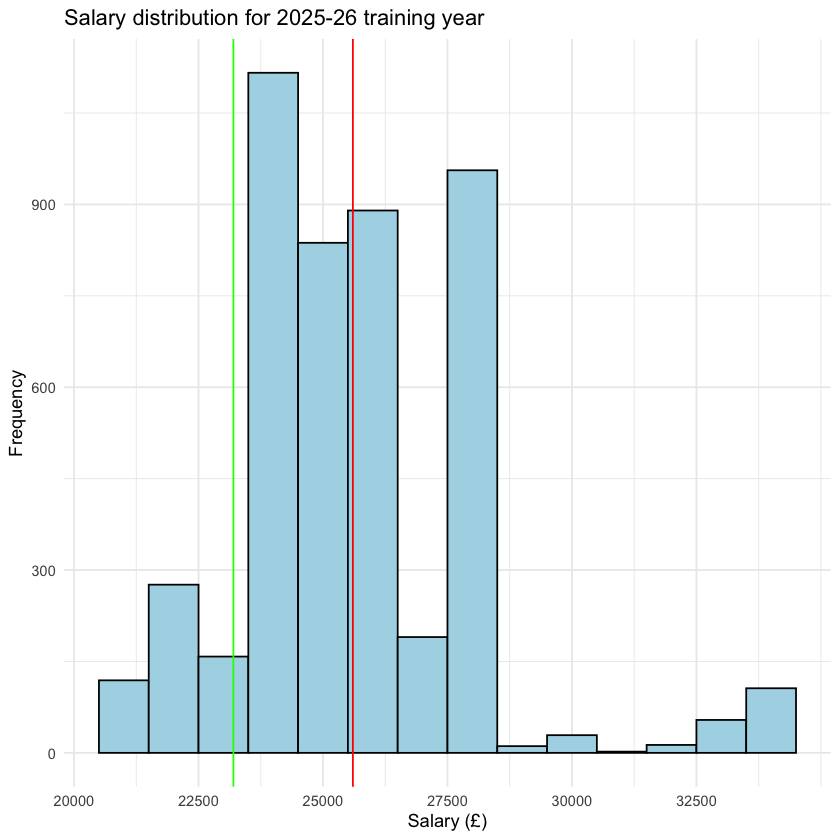

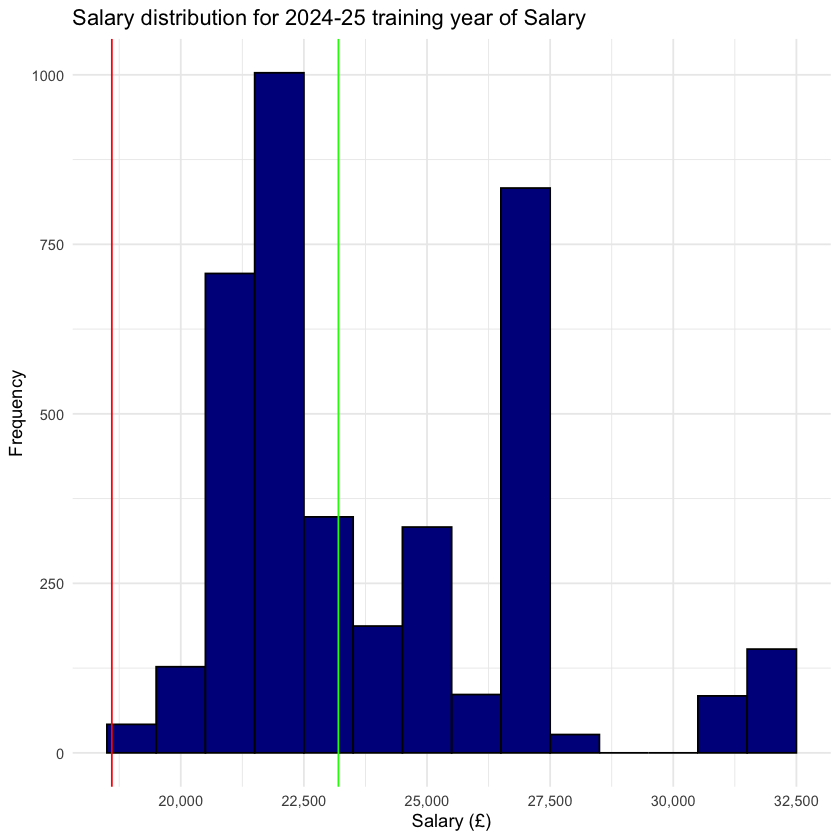

In [41]:
# Salary plots
# Expand the data to show the number of available slots

OD2526_expanded <- OD2526_modified %>%
    uncount(AvailableSlots) 


OD2526_salary_plot_expanded <- ggplot(OD2526_expanded, aes(x = Salary)) + 
  geom_histogram(binwidth = 1000, colour = 'black',fill = 'light blue') + 
  ggtitle("Salary distribution for 2025-26 training year") + 
  xlab("Salary (£)") + 
  ylab("Frequency") +
  scale_x_continuous(breaks = seq(0, max(OD2526_modified$Salary, na.rm = TRUE), by = 2500)) +
  theme_minimal() +
  geom_vline(xintercept = 25600, color = "red") +
  geom_vline(xintercept = UK_minimum_salary, color = "green")

OD2526_salary_plot_expanded

OD2425_expanded <- OD2425_modified %>%
    uncount(AvailableSlots)

OD2425_salary_plot_expanded <- ggplot(OD2425_expanded, aes(x = Salary)) + 
  geom_histogram(binwidth = 1000, colour = 'black', fill = 'dark blue') + 
  ggtitle("Salary distribution for 2024-25 training year of Salary") + 
  xlab("Salary (£)") + 
  ylab("Frequency") +
  scale_x_continuous(
    breaks = seq(0, max(OD2526_modified$Salary, na.rm = TRUE), by = 2500), 
    labels = scales::comma  # Use comma format for large numbers
  ) +
  theme_minimal() +
  geom_vline(xintercept = 18600, color = "red") +
  geom_vline(xintercept = UK_minimum_salary, color = "green")

OD2425_salary_plot_expanded

# Working hour plot
# Salary and visa plot

In [ ]:
# Define the plot for Salary with meaningful intervals
salary.plot <- ggplot(OD, aes(x = Salary)) + 
  geom_histogram(binwidth = 500) + 
  ggtitle("Histogram of Salary") + 
  xlab("Salary") + 
  ylab("Frequency") +
  scale_x_continuous(breaks = seq(20000, max(OD$Salary, na.rm = TRUE), by = 2500))

# Display the plot

length(unique(OD$Salary))
unique(OD$Salary)

# Define the plot for Salary with meaningful intervals
salary.plot <- ggplot(OD, aes(x = Salary)) + 
  geom_histogram(binwidth = 1500) + 
  ggtitle("Histogram of Salary") + 
  xlab("Salary") + 
  ylab("Frequency") +
  scale_x_continuous(breaks = seq(20000, max(OD$Salary, na.rm = TRUE), by = 2500)) +
  theme_bw() +
  geom_vline(xintercept = 25600, color = "red") 

        

salary.plot



In [ ]:
community.pharmacy.average.salary <- mean(OD$Salary[OD$Employer.Type == "Primary Care"], na.rm = TRUE)
community.pharmacy.average.salary
community.min.salary <- min(OD$Salary[OD$Employer.Type == "Primary Care"], na.rm = TRUE)
community.max.salary <- max(OD$Salary[OD$Employer.Type == "Primary Care"], na.rm = TRUE)
paste0("The average salary for community pharmacy is ", community.pharmacy.average.salary, " with a minimum of ", community.min.salary, " and a maximum of ", community.max.salary)

hospital.pharmacy.average.salary <- mean(OD$Salary[OD$Employer.Type == "Hospital"], na.rm = TRUE)
hospital.pharmacy.average.salary
hospital.min.salary <- min(OD$Salary[OD$Employer.Type == "Hospital"], na.rm = TRUE)
hospital.max.salary <- max(OD$Salary[OD$Employer.Type == "Hospital"], na.rm = TRUE)
paste0("The average salary for hospital pharmacy is ", hospital.pharmacy.average.salary, " with a minimum of ", hospital.min.salary, " and a maximum of ", hospital.max.salary)

In [ ]:
num_hosp <- filter(OD, Employer.Type == "Hospital") %>% nrow()  
num_hosp

soreted_salary <- OD[order(-OD$Salary),]
# head(soreted_salary)

# 34098 might be a wrong salary

OD <- OD %>% mutate(Salary = ifelse(Salary == 34098,34089,Salary))
soreted_salary[70,]
soreted_salary[80,]

#https://faq.nhsbsa.nhs.uk/knowledgebase/article/KA-23439/en-us
#https://www.healthcareers.nhs.uk/working-health/working-nhs/nhs-pay-and-benefits/agenda-change-pay-rates


num_hosp_with_london_weighting <- filter(OD, Employer.Type == "Hospital" & Salary == 34089) %>% nrow()  
num_hosp_with_london_weighting
# This is not the total number of places available in hospitals, but the number of programmes with London weighting

In [ ]:
result <- OD %>%
    filter(Salary == 34098) 
result

In [ ]:
OD2324 <- read.csv("oriel2324.csv")
sum(OD2324$Places.Available)
ggplot(OD2324, aes(x = Salary)) + 
  geom_histogram(binwidth = 1500) + 
  ggtitle("Histogram of Salary") + 
  xlab("Salary") + 
  ylab("Frequency") +
  scale_x_continuous(breaks = seq(20000, max(OD$Salary, na.rm = TRUE), by = 2500)) +
  theme_bw() +
  geom_vline(xintercept = 18600, color = "red") 

In [ ]:
#Expand the data frame to reflect true number of places available
sample_plot <- OD %>%
    uncount(Places.Available) 

colnames(sample_plot)

ggplot(sample_plot, aes(x = Salary)) + 
  geom_histogram(binwidth = 1500) + 
  ggtitle("Histogram of Salary") + 
  xlab("Salary") + 
  ylab("Frequency") +
  theme_bw() +
  geom_vline(xintercept = 25600, color = "red")

colnames(OD)

In [ ]:
colnames(OD2324)
OD2324_expanded <- OD2324 %>%
    uncount(Places.Available) 

ggplot(OD2324_expanded, aes(x = Salary)) + 
  geom_histogram(binwidth = 1500) + 
  ggtitle("Histogram of Salary") + 
  xlab("Salary") + 
  ylab("Frequency") +
  theme_bw() +
  geom_vline(xintercept = 18600, color = "red")

count(OD2324_expanded)

In [ ]:
readRenviron("/.renviron")

In [ ]:
OPENAI_API_KEY <- Sys.getenv("open_ai_api_key")

Sys.setenv(
    OPENAI_API_KEY = OPENAI_API_KEY
)

In [ ]:
sample_programme_description = sample_OD$Programme.Description[2106]

sample_prompt = paste0("List three very brief bullet points why this programme is good and create relevant tags for sorting: ", sample_programme_description)

In [ ]:
sample_OD$Programme.Description[2106]


In [ ]:
example_gpt <- create_chat_completion(
    model = "gpt-3.5-turbo",
    messages = list(
        list(
            "role" = "user",
            "content" = sample_prompt
        )
    )
)
example_gpt

In [ ]:
example_gpt$choices$message.content